<a href="https://colab.research.google.com/github/IslamAlam/multi-spectral_image_classification/blob/master/multi_spectral_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone Repo from GIT

In [1]:
!git clone https://github.com/IslamAlam/multi-spectral_image_classification.git

Cloning into 'multi-spectral_image_classification'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 36 (delta 8), reused 23 (delta 4), pack-reused 0
Unpacking objects: 100% (36/36), done.


## Install Required Packages:

In [2]:
!apt install python3-rtree
!pip install Pillow
!pip install rasterio
!pip install numpy
!pip install shapely
!pip install geopandas
!pip install earthpy
!pip install descartes
#!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 6 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-

In [3]:
cd multi-spectral_image_classification/

/content/multi-spectral_image_classification


In [4]:
ls

00_nb_run.sh  data/            multi_spectral_image_classification.ipynb
01_main.py    environment.yml  requirements.txt


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 01:48:14 2019
Last modified on Wed Apr 06 2019
@author: Islam Mansour
Purpose: Reada shapefile with geopandas as a dataframe and reproject the
         shapefile.
"""
###############################################################################
# Import Packages
# ------------------------------
#
# To begin, import the needed packages. You will use a combination of several EarthPy
# modules including spatial, plot and mask.

import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import numpy as np
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
# import cartopy as cp
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
plt.ion()
os.chdir(os.path.join(et.io.HOME, '/content/multi-spectral_image_classification'))
# optional - turn off warnings
import warnings
warnings.filterwarnings('ignore')

### Define the data path

In [0]:
#%%
RASTER_DATA_FILE = "./data/image/crop_p224r63_all_bands.tif"
TRAIN_DATA_PATH = "./data/train/"
TEST_DATA_PATH = "./data/test/"

### Define reproject_layer  to project any shapfile or GeoTiff to new_crs

In [0]:
# https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/reproject-raster/
def reproject_layer(inpath, outpath, new_crs):
    '''
    * This function reprojects a raster GeoTIFF or vector (shp) to a new selected Coordinate Reference System (CRS) then
    save the reprojected GeoTIFF/shp to outpath

    PARAMETERS:
        inpath = path to orginal GeoTIFF to be reprojected/ shp; for example:
        outpath = path to save the newly reprojected GeoTIFF; for example: "data/reprojected.tif" or shp
        new_crs = required CRS projection ; for example: "epsg:4326"

    RETURNS:
        create a new reprojected GeoTIFF

    REQUIREMENTS:
        import rasterio as rio
        import os
        import earthpy as et
        import numpy as np
        from rasterio.warp import calculate_default_transform, reproject, Resampling
    '''
    dst_crs = new_crs  # CRS for web meractor

    if '.shp' in inpath:
        src = gpd.read_file(inpath)
        # Reproject the data
        data = src.to_crs(epsg=dst_crs.split('EPSG:', 1)[1])
        # Save to disk
        data.to_file(outpath)


    else:
        with rio.open(inpath) as src:
            transform, width, height = calculate_default_transform(
                src.crs, dst_crs, src.width, src.height, *src.bounds)
            kwargs = src.meta.copy()
            kwargs.update({
                'crs': dst_crs,
                'transform': transform,
                'width': width,
                'height': height
            })

            with rio.open(outpath, 'w', **kwargs) as dst:
                for i in range(1, src.count + 1):
                    reproject(
                        source=rio.band(src, i),
                        destination=rio.band(dst, i),
                        src_transform=src.transform,
                        src_crs=src.crs,
                        dst_transform=transform,
                        dst_crs=dst_crs,
                        resampling=Resampling.nearest)
#%%

# 1- Project GeoTiff and shapfiles
Reproject the image and shapefiles to the following projection:
Universal Transverse Mercator (UTM) 22 South with an WGS 84 ellipsoid.

In [0]:
# define crs
new_crs = 'EPSG:29192'


# import the GeoTIFF
TIFF_INPATH = RASTER_DATA_FILE
TIFF_OUTPATH = RASTER_DATA_FILE[:-4] + '_' + new_crs.split('EPSG:', 1)[1] + RASTER_DATA_FILE[-4:]

# import the data train data
TRAIN_DATA_INPATH = (TRAIN_DATA_PATH + "train_data.shp")
TRAIN_DATA_OUTPATH = TRAIN_DATA_INPATH[:-4] + '_' + new_crs.split('EPSG:', 1)[1] + TRAIN_DATA_INPATH[-4:]

# import the test data
TEST_DATA_INPATH = (TEST_DATA_PATH + "val_data.shp")
TEST_DATA_OUTPATH = TEST_DATA_INPATH[:-4] + '_' + new_crs.split('EPSG:', 1)[1] + TEST_DATA_INPATH[-4:]

#%% Re-project
reproject_layer(TIFF_INPATH, TIFF_OUTPATH, new_crs)
reproject_layer(TEST_DATA_INPATH, TEST_DATA_OUTPATH, new_crs)
reproject_layer(TRAIN_DATA_INPATH, TRAIN_DATA_OUTPATH, new_crs)




### Check to make sure function created new files correctly

In [9]:
tiff_project = rio.open(TIFF_OUTPATH)
train_data_project = gpd.read_file(TRAIN_DATA_OUTPATH)
test_data_project = gpd.read_file(TEST_DATA_OUTPATH)

print('GeoTIFF file crs', tiff_project.crs)
print("Train shape file crs", train_data_project.crs)
print("Val shape file crs", test_data_project.crs)

GeoTIFF file crs EPSG:29192
Train shape file crs {'init': 'epsg:29192'}
Val shape file crs {'init': 'epsg:29192'}


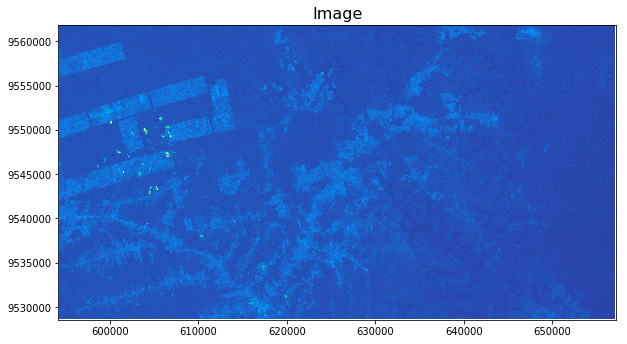

In [10]:
# open the reporjected GeoTiff file
with rio.open(TIFF_OUTPATH) as src:
    tiff_im = src.read(masked = True)[0]
    extent = rio.plot.plotting_extent(src)
    soap_profile = src.profile
fig, ax = plt.subplots(figsize=(10, 10))

show(tiff_im,
     cmap='terrain',
     ax=ax,
     extent=extent)

ax.set_title("Image",
             fontsize = 16);



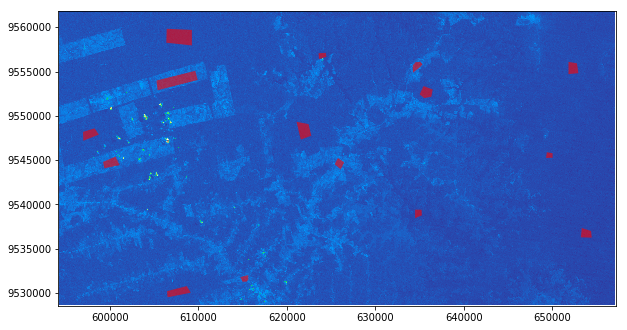

In [11]:
# Overlay shape file of train data

vector_layer = train_data_project
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(tiff_im,
          cmap='terrain',
          extent=extent)
vector_layer.plot(ax=ax, alpha=.6, color='r')

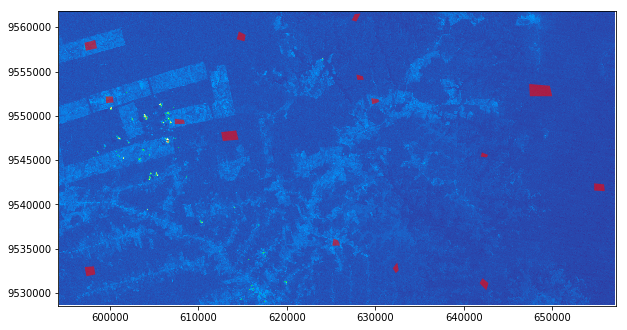

In [12]:
# Overlay shape file of train data

vector_layer = test_data_project
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(tiff_im,
          cmap='terrain',
          extent=extent)
vector_layer.plot(ax=ax, alpha=.6, color='r')